# Python for Machine Learning
Softbank Robotics Europe

This code is divided in two parts: 
    * one scikit-learn example from the official documentation
    * the workshop to complete
Your work will be evaluated by lauching the whole script. 

Little reminder: it is good to comment your code, but not too much ;) 
    


## Scikit Learn Package Example

Code taken from:
    http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

Automatically created module for IPython interactive environment


/home/damien/.local/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/damien/.local/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/damien/.local/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


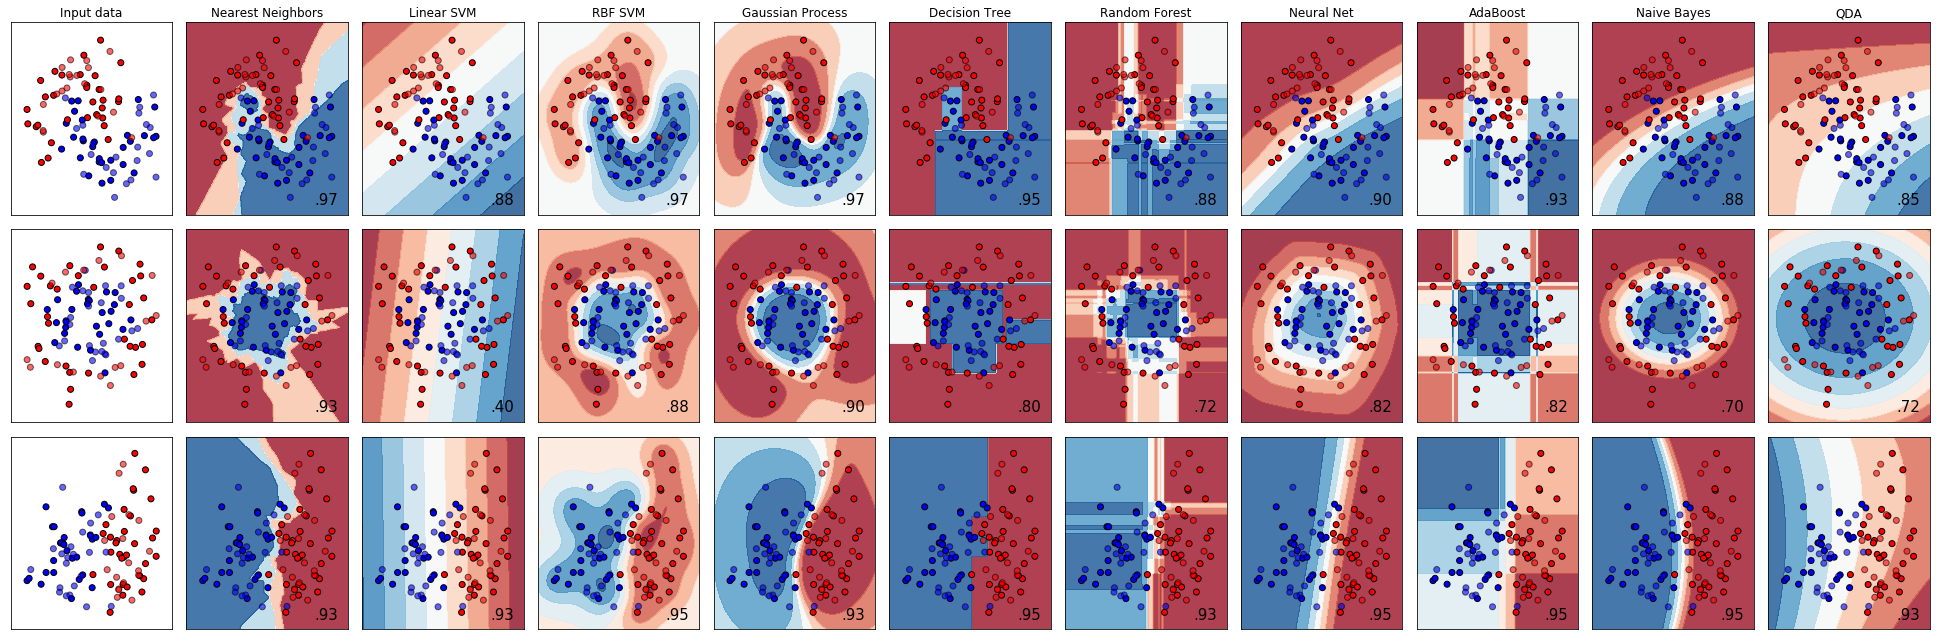

In [1]:
print(__doc__)


# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
%matplotlib inline

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

## Workshop
You will need to "import" the necessary packages to complete your work (in addition to the packages already imported in the example).

### Step 0: import the packages:

In [2]:
# import ...
import pickle
from mpl_toolkits.mplot3d import Axes3D

# disable warnings for libraries
import warnings
warnings.filterwarnings("ignore")

from tqdm import tqdm

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

# pip3 install coclust
import coclust.evaluation.external

import pandas as pd

### Step 1.1: import data
You will find the pickle file at the address: [data.pickle](https://gitlab.com/susisanchezr/tp_python_sbre/raw/master/data.pickle). This file contains a python dictionary with the following variables:
* X_train
* Y_train
* X_test
* Y_test

You will train the models on the training dataset and the evaluation on the test dataset...

There is one example per line, where X contains the corresponding vectors of the data and Y the labels.

In [3]:
# with ...
#     data = ...
# X_train = ...

with open("data.pickle", "rb") as f:
    data = pickle.load(f)

print("list(data.keys())", list(data.keys()))

list(data.keys()) ['X_train', 'X_test', 'Y_train', 'Y_test']


In [4]:
X_train = data["X_train"]
y_train = data["Y_train"]
X_test = data["X_test"]
y_test = data["Y_test"]

In [5]:
print("X_train.shape", X_train.shape)
print("y_train.shape", y_train.shape)
print("X_test.shape", X_test.shape)
print("y_test.shape", y_test.shape)

X_train.shape (670, 30)
y_train.shape (670,)
X_test.shape (330, 30)
y_test.shape (330,)


#### Look at the data

In [6]:
print("X_train[0:2]")
print(X_train[0:2])

X_train[0:2]
[[-6.26461756  3.39873927  2.11432756  1.04185977  0.54984407 -0.75501862
   0.15925432 -6.99849849  2.98549132  2.60297119  1.01931232  0.26265927
  -0.66546249  0.22266172 -3.72389437  5.73025773 -5.72026456  2.11129261
  -0.15843175  2.19259145 -3.48592115 -2.92058492  0.98586344  1.59481014
  -2.51421391 -0.54511283  2.16893143  0.21071555  0.29450198  6.14648833]
 [-7.05377687  1.51163575 -0.69092112  0.56463488 -0.47442049  1.00138275
  -1.19824348 -5.97156483  4.91288392  3.78668411  0.39122489 -0.52693886
  -0.61457734  2.3215942  -1.48551684  3.57647679 -5.87422318 -0.54196424
   0.76486059  1.19177949 -3.65422572 -3.69615238  2.06382654  0.62814416
  -1.6283221  -2.05687088  0.59509285 -1.69401143 -1.55794218  7.41752905]]


#### Look at the labels

In [7]:
y_train_modalities = np.unique(y_train)
y_test_modalities = np.unique(y_test)
n_classes = len(y_train_modalities)

print("y_train_modalities", y_train_modalities)
print("y_test_modalities", y_test_modalities)
print("n_classes", n_classes)

y_train_modalities [0 1 2]
y_test_modalities [0 1 2]
n_classes 3


#### Remark

There are 3 classes : 0, 1, 2

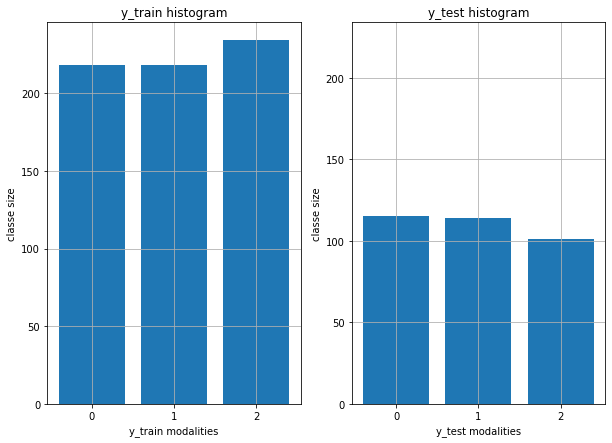

In [8]:
plt.figure(figsize=(10, 10))
max_bincount_height = -np.inf

for i, (y, ml_set) in enumerate(zip([y_train, y_test], ["y_train", "y_test"])):
    y_modalities = np.unique(y)
    bincount = np.bincount(y, minlength=len(y_modalities))
    x_axis = np.arange(len(y_modalities))
    if max(bincount)>max_bincount_height:
        max_bincount_height = max(bincount)
        
    plt.subplot(1, 2, i+1)
    plt.bar(x_axis, bincount, align='center')
    plt.title('{} histogram'.format(ml_set))
    plt.xticks(x_axis, y_modalities)
    plt.xlabel('{} modalities'.format(ml_set))
    plt.ylabel('classe size')
    plt.subplots_adjust(bottom=0.35)
    plt.grid()
    
plt.ylim([0, max_bincount_height])
plt.show()

#### Remark

Looking at the histograms, we can see that no class is under-represented in the training and test sets.

### Step 1.2: data preprocessing
Use the PCA algorithm from scikit-learn to reduce the X vectors dimension to 3 features.

### StandardScaler

[Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [9]:
standard_scaler = StandardScaler(with_mean=True, with_std=False)
standard_scaler.fit(X_train)
X_train = standard_scaler.transform(X_train)
X_test = standard_scaler.transform(X_test)

#### Remark

I get better accuracies when I only center the data.

#### PCA

[Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

In [10]:
# X_train_pca = ...

n_components = 3
pca = PCA(n_components=n_components)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

### Step 2: data visualization 
You can use the visualization package of your preference (matplotlib, pyplot, ....)

with a bit of color...

In [11]:
# mplot3d tutorial : https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html

def plot_points(X_train, y_train, cluster_centers=None):
    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_subplot(111, projection='3d')

    colors = ['b', 'g', 'r', 'm', 'y', 'w', 'c']
    markers = ['.', 's', 'p', '*', '+', 'X', 'P']

    for (x, y, z), i in zip(X_train, y_train):
        ax.scatter(x, y, z, c=colors[i], marker=markers[i], zorder=1, label=str(i))
    
    if cluster_centers is not None:
        for x, y, z in cluster_centers:
            ax.scatter(x, y, z, c='k', marker='D', s=50, zorder=2, label="cluster center")

    ax.set_xlabel('x-axis')
    ax.set_ylabel('y-axis')
    ax.set_zlabel('z-axis')
    plt.title("Points in the 3D coordinate system\n")
    
    # Prevent a same label from appearing several times in the legend
    handles, labels = plt.gca().get_legend_handles_labels()
    dictionnary = dict(zip(labels, handles))
    plt.legend(dictionnary.values(), dictionnary.keys(),
               bbox_to_anchor=(1.15, 0.65))
    plt.show()

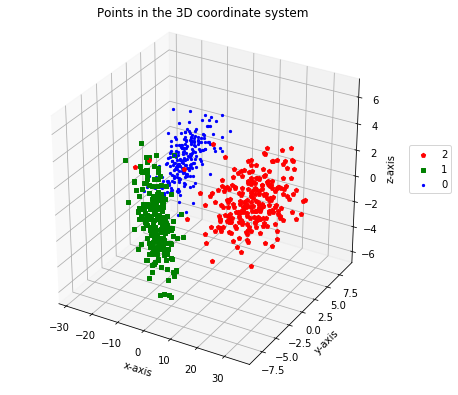

In [12]:
plot_points(X_train_pca, y_train)

### Step 3: unsupervised method
Apply **two** clustering methods of your preference (for example k-means and DBSCAN)

In [13]:
def print_predicted_modalities(y_pred, ml_set="train"):
    y_pred_modalities = np.unique(y_pred)
    print("y_{}_pred_modalities".format(ml_set), y_pred_modalities)

### Coclust

Coclust is especially usefull to compute accuracies for clustering predictions as labels may have been permuted.

`pip3 install coclust`

[Documentation](https://coclust.readthedocs.io/en/v0.2.1/api/evaluation.html#coclust.evaluation.external.accuracy)

In [14]:
def compute_accuracy(y_true, y_pred):
    return coclust.evaluation.external.accuracy(y_true, y_pred)

#### KMeans

[Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

In [15]:
res = pd.DataFrame(columns=["Train Accuracy", "Test Accuracy"])

In [16]:
n_clusters = n_classes
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X_train_pca)
cluster_centers = kmeans.cluster_centers_
y_train_pred_kmeans = kmeans.predict(X_train_pca)
y_test_pred_kmeans = kmeans.predict(X_test_pca)

In [17]:
print_predicted_modalities(y_train_pred_kmeans)
print_predicted_modalities(y_test_pred_kmeans, ml_set="test")

y_train_pred_modalities [0 1 2]
y_test_pred_modalities [0 1 2]


In [18]:
res.loc["KMeans", :] = (compute_accuracy(y_train, y_train_pred_kmeans),
                        compute_accuracy(y_test, y_test_pred_kmeans))

print(res)

       Train Accuracy Test Accuracy
KMeans       0.985075      0.966667


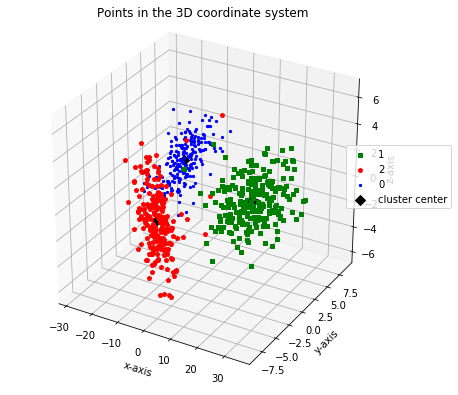

In [19]:
plot_points(X_train_pca, y_train_pred_kmeans, cluster_centers=cluster_centers)

#### DBSCAN

DBSCAN is a transductive algorithm. This means that we fit and predict on the same data.

[Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)

In [20]:
dbscan = DBSCAN(eps=3.5, min_samples=2)
dbscan.fit(X_train_pca)
y_train_pred_dbscan = dbscan.fit_predict(X_train_pca)
y_test_pred_dbscan = dbscan.fit_predict(X_test_pca)

In [21]:
print_predicted_modalities(y_train_pred_dbscan)
print_predicted_modalities(y_test_pred_dbscan, ml_set="test")

y_train_pred_modalities [-1  0  1  2]
y_test_pred_modalities [-1  0  1  2]


#### Remark

-1 means that DBSCAN did not manage to find a cluster for this point.

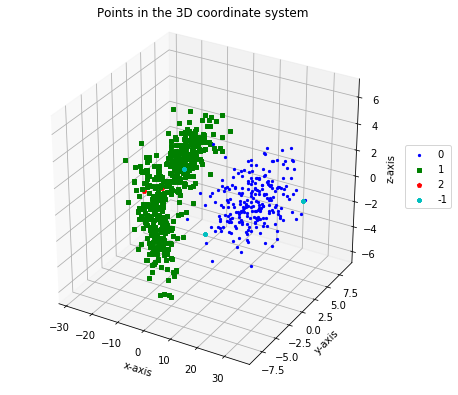

In [22]:
plot_points(X_train_pca, y_train_pred_dbscan)

In [23]:
res.loc["DBSCAN", :] = (compute_accuracy(y_train, y_train_pred_dbscan),
                        compute_accuracy(y_test, y_test_pred_dbscan))

print(res)

       Train Accuracy Test Accuracy
KMeans       0.985075      0.966667
DBSCAN       0.670149      0.636364


### Step 4: supervised method
Apply **two** supervised learning methods (one of them using [MLP](http://scikit-learn.org/stable/modules/neural_networks_supervised.html))

#### MLPClassifier

[Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

In [24]:
clf = MLPClassifier(random_state=1)
clf.fit(X_train_pca, y_train)
y_train_pred_mlp = clf.predict(X_train_pca)
y_test_pred_mlp = clf.predict(X_test_pca)

In [25]:
print_predicted_modalities(y_train_pred_mlp)
print_predicted_modalities(y_test_pred_mlp, ml_set="test")

y_train_pred_modalities [0 1 2]
y_test_pred_modalities [0 1 2]


In [26]:
res.loc["MLPClassifier", :] = (compute_accuracy(y_train, y_train_pred_mlp),
                               compute_accuracy(y_test, y_test_pred_mlp))

print(res)

              Train Accuracy Test Accuracy
KMeans              0.985075      0.966667
DBSCAN              0.670149      0.636364
MLPClassifier       0.995522      0.981818


#### KNeighborsClassifier

We need a validation set to find the best value for hyperparameter `n_neighbors`

[Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [27]:
small_X_train_pca, small_X_val_pca, small_y_train, small_y_val = \
    train_test_split(X_train_pca, y_train, test_size=0.2, random_state=42)

In [28]:
print("small_X_train_pca.shape", small_X_train_pca.shape)
print("small_X_val_pca.shape", small_X_val_pca.shape)
print("small_y_train.shape", small_y_train.shape)
print("small_y_val.shape", small_y_val.shape)

small_X_train_pca.shape (536, 3)
small_X_val_pca.shape (134, 3)
small_y_train.shape (536,)
small_y_val.shape (134,)


In [29]:
grid_n_neighbors = np.arange(1, 26, 1)

information = {"train_accuracy": [], "val_accuracy": [], "model": []}

for n_neighbors in tqdm(grid_n_neighbors):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(small_X_train_pca, small_y_train)
    clf.fit(small_X_val_pca, small_y_val)    
    y_train_pred_knn = clf.predict(small_X_train_pca)
    y_val_pred_knn = clf.predict(small_X_val_pca)
    information["train_accuracy"].append(compute_accuracy(small_y_train, y_train_pred_knn))
    information["val_accuracy"].append(compute_accuracy(small_y_val, y_val_pred_knn))
    information["model"].append(clf)

index_best_val_accuracy = np.argmax(information["val_accuracy"])
best_val_accuracy = information["val_accuracy"][index_best_val_accuracy]
best_n_neighbors = grid_n_neighbors[index_best_val_accuracy]

clf = information["model"][index_best_val_accuracy]
y_train_pred_knn = clf.predict(X_train_pca)
y_test_pred_knn = clf.predict(X_test_pca)

print("best_val_accuracy", best_val_accuracy)
print("best_n_neighbors", best_n_neighbors)

100%|██████████| 25/25 [00:01<00:00, 24.74it/s]


best_val_accuracy 1.0
best_n_neighbors 1


In [30]:
print_predicted_modalities(y_train_pred_knn)
print_predicted_modalities(y_test_pred_knn, ml_set="test")

y_train_pred_modalities [0 1 2]
y_test_pred_modalities [0 1 2]


In [31]:
res.loc["KNeighborsClassifier", :] = (compute_accuracy(y_train, y_train_pred_knn),
                                      compute_accuracy(y_test, y_test_pred_knn))

print(res)

                     Train Accuracy Test Accuracy
KMeans                     0.985075      0.966667
DBSCAN                     0.670149      0.636364
MLPClassifier              0.995522      0.981818
KNeighborsClassifier       0.989552      0.981818


### Step 5: evaluation
For each of the 4 methods used: evaluate the performance of the model on the test dataset with a metric of your preference.

In [32]:
res

,Train Accuracy,Test Accuracy
KMeans,0.985075,0.966667
DBSCAN,0.670149,0.636364
MLPClassifier,0.995522,0.981818
KNeighborsClassifier,0.989552,0.981818


#### Remark

Highest accuracies on the test set are achieved with MLPClassifier and KNeighborsClassifier.

### Step 6: open question 
By analyzing the characteristics of your PCA model, indicate how many dimensions are necessary to represent 75% of the training information. 

In [33]:
pca.explained_variance_ratio_

array([0.81986577, 0.08279081, 0.01870714])

#### Remark

According to the [PCA documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html), `explained_variance_ratio_` gives the percentage of variance explained by each of the selected components.

Thus, keeping only the first dimension is enough to represent 75% of the training information.

### Step 7: optional question
Propose a code using the flask package that serves a web page displaying your name and a link that points at [http://scikit-learn.org](http://scikit-learn.org) and opens a figure of your preference.

In [34]:
from flask import Flask

In [ ]:
app = Flask(__name__)

@app.route('/')
def hello():
    return "<body><p>My name is Damien Toomey.</p>\
            <p>Here is the link to sklearn : <a href='http://scikit-learn.org'>http://scikit-learn.org</a></p>\
            <img src='http://openclassroom.stanford.edu/MainFolder/courses/MachineLearning/exercises/ex9materials/bird_large.jpg' alt='A bird' style='width:500px;height:600px;''></body>"

if __name__ == '__main__':
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [16/Feb/2020 22:55:42] "GET / HTTP/1.1" 200 -


### Step 8: submission
Send your python script or your notebook at: [marine.chamoux@softbankrobotics.com](mailto:marine.chamoux@softbankrobotics.com)